# CarAssignment

### Importing and Understanding Data

In [1]:
import pandas as pd

In [2]:
# Importing the Car Price data
car_prices = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# view first five rows
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# view last five rows
car_prices.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
# data info: column names, sizes, types, etc
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

<b><font color=blue>There are 26 columns and 205 observations/rows. Also note the types of column to identify contiuous and categorical variable count. From data dictionary it is evident that symboling which ihas dtype:int64 is a categorical column.</font></b>

### Data Preparation

#### Checking for Missing Values

In [6]:
# Look if there are any missing values
car_prices.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<b><font color=blue>There are no null values.</font></b>

#### Creating dummy columns

- check the unique values in columns to check number of categories in different categorical variables

In [7]:
# Unique values in the columns
car_prices.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- create dummy variables for all categorical columns

In [8]:
# Creating dummy variables for the variable 'fueltype' and dropping the first one.
fueltype = pd.get_dummies(car_prices['fueltype'],prefix='fueltype',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,fueltype],axis=1)

# Creating dummy variables for the variable 'aspiration' and dropping the first one.
aspiration = pd.get_dummies(car_prices['aspiration'],prefix='aspiration',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,aspiration],axis=1)

# Creating dummy variables for the variable 'doornumber' and dropping the first one.
doornumber = pd.get_dummies(car_prices['doornumber'],prefix='doornumber',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,doornumber],axis=1)

# Creating dummy variables for the variable 'enginelocation' and dropping the first one.
enginelocation = pd.get_dummies(car_prices['enginelocation'],prefix='enginelocation',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,enginelocation],axis=1)

# Creating dummy variables for the variable 'carbody' and dropping the first one.
carbody = pd.get_dummies(car_prices['carbody'],prefix='carbody',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,carbody],axis=1)

# Creating dummy variables for the variable 'drivewheel' and dropping the first one.
drivewheel = pd.get_dummies(car_prices['drivewheel'],prefix='drivewheel',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,drivewheel],axis=1)

# Creating dummy variables for the variable 'enginetype' and dropping the first one.
enginetype = pd.get_dummies(car_prices['enginetype'],prefix='enginetype',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,enginetype],axis=1)

# Creating dummy variables for the variable 'fuelsystem' and dropping the first one.
fuelsystem = pd.get_dummies(car_prices['fuelsystem'],prefix='fuelsystem',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,fuelsystem],axis=1)

# Creating dummy variables for the variable 'symboling' and dropping the first one.
symboling = pd.get_dummies(car_prices['symboling'],prefix='symboling',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,symboling],axis=1)

# Creating dummy variables for the variable 'cylindernumber' and dropping the first one.
cylindernumber = pd.get_dummies(car_prices['cylindernumber'],prefix='cylindernumber',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,cylindernumber],axis=1)

In [9]:
# Drop the columns for which dummy variables are created
car_prices = car_prices.drop(['fueltype','aspiration','doornumber','enginelocation','carbody', 
                              'drivewheel', 'enginetype', 'fuelsystem', 'symboling', 
                              'cylindernumber'], 1)

In [10]:
car_prices.head()

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,1,0,0,0,0
1,2,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,1,0,0,0,0
2,3,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,1,0,0,0
3,4,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,1,0,0,1,0,0,0,0
4,5,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,1,0,1,0,0,0,0,0


<b><font color=blue>We can see that the dummy columns are added to the dataframe.</font></b>

In [11]:
car_prices.columns

Index(['car_ID', 'CarName', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'enginelocation_rear', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [12]:
# Drop the columns car_ID as it won't be requierd for further analysis
car_prices.drop(['car_ID'], axis = 1, inplace=True)

#### Creating Derived variables

- extracting car company name from CarName

In [13]:
#Extract car company from car name column value
car_prices['car_company_name'] = car_prices['CarName'].apply(lambda x:x.split()[0])

# drop the column CarName as we will be analysing further on car_company_name
car_prices.drop(['CarName'], axis = 1, inplace=True)

In [14]:
car_prices.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_1,symboling_2,symboling_3,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_company_name
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,1,0,0,0,0,alfa-romero
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,1,0,0,0,0,alfa-romero
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,1,0,0,0,0,1,0,0,0,alfa-romero
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,1,0,0,0,0,audi
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,1,0,1,0,0,0,0,0,audi


In [15]:
# Check Unique company names
car_prices.car_company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<b><font color=blue>There are multiple entries for certain companies due to spelling/case/abbreviations issues.</font><b>

In [16]:
#fixing values in Car company names
car_prices.car_company_name = car_prices.car_company_name.replace({"maxda": "mazda",
                                                               "Nissan": "nissan",
                                                               "porcshce":"porsche",
                                                               "toyouta":"toyota",
                                                               "vokswagen":"volkswagen",
                                                               "vw":"volkswagen"})

In [17]:
# Check Unique company names
car_prices.car_company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<b><font color=blue>Car company name column now has unique company names</font></b>

- 

In [18]:
# Creating dummy variables for the variable 'car_company_name' and dropping the first one.
car_company_name = pd.get_dummies(car_prices['car_company_name'],prefix='car_company_name',drop_first=True)
#Adding the results to the master dataframe
car_prices = pd.concat([car_prices,car_company_name],axis=1)

In [19]:
# Drop the car_company_name column
car_prices = car_prices.drop(['car_company_name'], 1)

In [20]:
car_prices.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_name_nissan,car_company_name_peugeot,car_company_name_plymouth,car_company_name_porsche,car_company_name_renault,car_company_name_saab,car_company_name_subaru,car_company_name_toyota,car_company_name_volkswagen,car_company_name_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


### Data Standardisation: rescaling the features

<b><font color=blue>Let's check the variation of values of different variables to decide if we need standardisation/normalisation.</font></b>

In [21]:
car_prices.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_name_nissan,car_company_name_peugeot,car_company_name_plymouth,car_company_name_porsche,car_company_name_renault,car_company_name_saab,car_company_name_subaru,car_company_name_toyota,car_company_name_volkswagen,car_company_name_volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.087805,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.283704,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b><font color=blue>Scale of different variables are different and have considerable variation from each other. So we should standardise/normalise the data.</font></b>

In [22]:
import numpy as np

#defining a standardisation function 
def standardise (x): 
    return ( (x-x.mean())/ x.std())
                                              
# applying standardise( ) to all columns 
car_prices = car_prices.apply(standardise) 

In [23]:
# Check dataframe after standardisation
car_prices.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_name_nissan,car_company_name_peugeot,car_company_name_plymouth,car_company_name_porsche,car_company_name_renault,car_company_name_saab,car_company_name_subaru,car_company_name_toyota,car_company_name_volkswagen,car_company_name_volvo
0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,...,-0.309495,-0.237538,-0.187566,-0.157728,-0.099016,-0.173216,-0.248743,-0.429032,-0.248743,-0.237538
1,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,...,-0.309495,-0.237538,-0.187566,-0.157728,-0.099016,-0.173216,-0.248743,-0.429032,-0.248743,-0.237538
2,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,...,-0.309495,-0.237538,-0.187566,-0.157728,-0.099016,-0.173216,-0.248743,-0.429032,-0.248743,-0.237538
3,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,...,-0.309495,-0.237538,-0.187566,-0.157728,-0.099016,-0.173216,-0.248743,-0.429032,-0.248743,-0.237538
4,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,...,-0.309495,-0.237538,-0.187566,-0.157728,-0.099016,-0.173216,-0.248743,-0.429032,-0.248743,-0.237538


<b><font color=blue>Data is now standardised.</font></b>

### Splitting data into training and testing sets

In [24]:
# Putting feature variable to X
X = car_prices[[column for column in car_prices.columns if column != 'price']]

# Putting response variable to y
y = car_prices['price']

In [25]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [26]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### Building a linear model

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm_1 = LinearRegression()

In [29]:
rfe = RFE(lm_1, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
 False  True  True False  True False  True False False False False False
 False False False False  True False False  True False False False False
 False False False False False  True  True False  True  True  True False
  True False False False False False False False False  True False  True
 False  True False  True False False False False]
[ 1  1  1  1  1  1  1  1  1 15  3 35 12  1  1 31  1  9  1  7  8 37 13 17 30
 38 10 36  1  4 33  1 42 34 40 43 14 26 28 27 29  1  1 16  1  1  1 19  1 25
 32  5 11 39 18 21 44  1 22  1  6  1 41  1 20 23 24  2]


In [30]:
col = X_train.columns[rfe.support_]
dropcol = X_train.columns[~rfe.support_]

### Building model using sklearn

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [34]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.02e-70
Time:                        15:35:34   Log-Likelihood:                 26.312
No. Observations:                 143   AIC:                            -4.625
Df Residuals:                     119   BIC:                             66.48
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [35]:
# Calculating Vif value
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
9,fueltype_gas,inf
19,cylindernumber_two,inf
14,fuelsystem_idi,inf
13,enginetype_rotor,inf
8,compressionratio,120.240000
5,enginesize,19.440000
4,curbweight,16.810000
1,carlength,13.270000
16,cylindernumber_four,9.540000
0,wheelbase,9.070000


<b><font color=blue>The VIF and p-value is high for many variable for RFE to 25 variables. Let's run another round of RFE and reduce variables to 20.</font></b>

In [36]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm_2 = LinearRegression()

In [37]:
rfe = RFE(lm_2, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True False  True  True  True  True False False False False
 False False  True False  True False  True False False False False False
 False False False False  True False False False False False False False
 False False False False False  True  True False  True  True  True False
  True False False False False False False False False  True False  True
 False  True False False False False False False]
[ 1  1  1  2  1  1  1  1  4 20  8 40 17  6  1 36  1 14  1 12 13 42 18 22 35
 43 15 41  1  9 38  5 47 39 45 48 19 31 33 32 34  1  1 21  1  1  1 24  1 30
 37 10 16 44 23 26 49  1 27  1 11  1 46  3 25 28 29  7]


In [38]:
col = X_train.columns[rfe.support_]
dropcol = X_train.columns[~rfe.support_]

### Building model using sklearn

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           3.90e-72
Time:                        15:35:36   Log-Likelihood:                 19.422
No. Observations:                 143   AIC:                             1.155
Df Residuals:                     123   BIC:                             60.41
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [43]:
# Calculating Vif value

vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
10,enginetype_rotor,inf
15,cylindernumber_two,inf
3,curbweight,16.480000
4,enginesize,15.690000
1,carlength,10.840000
12,cylindernumber_four,8.460000
2,carwidth,8.370000
0,wheelbase,6.570000
5,boreratio,3.720000
19,car_company_name_porsche,3.590000


## Correlation matrix

In [44]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

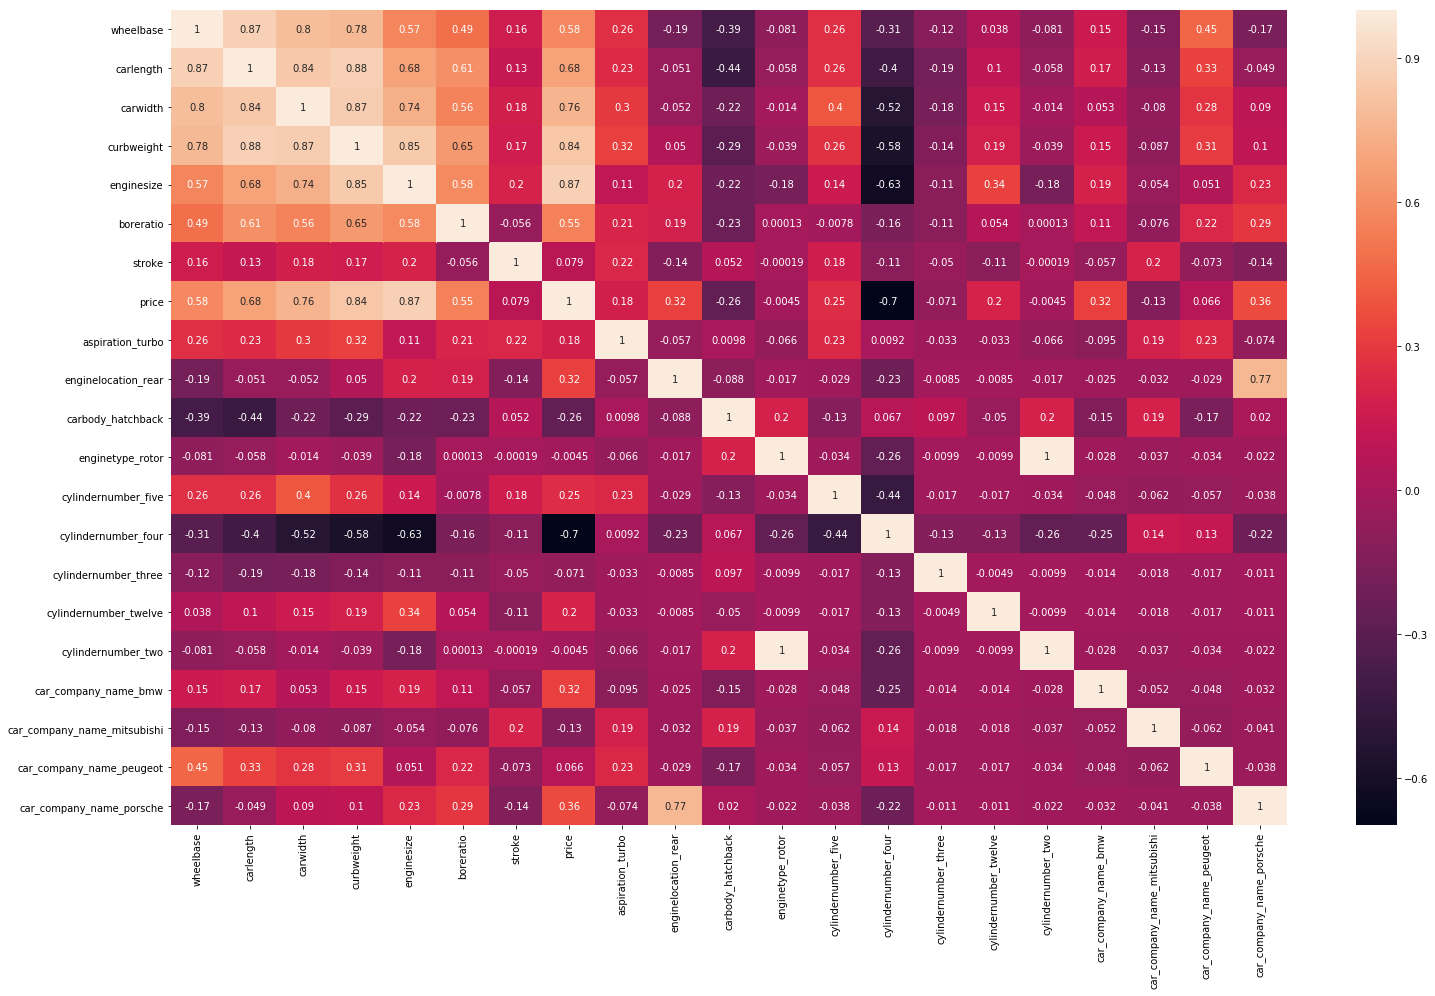

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,15))     # Size of the figure
sns.heatmap(car_prices.drop(dropcol, axis=1).corr(),annot = True)

### Dropping the Variable and Updating the Model

<b><font color=blue>Off the variables left after RFE, carlength variable has highest p-value (above 0.01) and high VIF. From the correlation matrix we can see that it is correlated with multiple variables. So let's drop that variable and create model 3.</font></b>

In [46]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('carlength', 1)

In [47]:
# Create a second fitted model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           6.59e-73
Time:                        15:35:39   Log-Likelihood:                 18.601
No. Observations:                 143   AIC:                            0.7981
Df Residuals:                     124   BIC:                             57.09
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [49]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
9,enginetype_rotor,inf
14,cylindernumber_two,inf
3,enginesize,14.990000
2,curbweight,12.040000
11,cylindernumber_four,8.390000
1,carwidth,7.480000
0,wheelbase,5.520000
4,boreratio,3.670000
18,car_company_name_porsche,3.350000
7,enginelocation_rear,3.240000


<b><font color=blue>Now p-value of wheelbase is highest at 0.348 (< 0.01) and VIF is also high at 5.52. From the correlation matrix we can see that it is correlated with multiple variables which is suggested with it's high VIF. So let's drop that variable and create model 4.</font></b>

In [50]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('wheelbase', 1)

In [51]:
# Create a second fitted model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           8.31e-74
Time:                        15:35:40   Log-Likelihood:                 18.091
No. Observations:                 143   AIC:                           -0.1819
Df Residuals:                     125   BIC:                             53.15
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
8,enginetype_rotor,inf
13,cylindernumber_two,inf
2,enginesize,14.990000
1,curbweight,11.280000
10,cylindernumber_four,8.190000
0,carwidth,5.760000
3,boreratio,3.660000
6,enginelocation_rear,3.230000
17,car_company_name_porsche,3.030000
9,cylindernumber_five,2.500000


<b><font color=blue>p-value of carbody_hatchback is highest now at 0.79 (above > 0.01). Let's drop that variable and create model 5.</font></b>

In [54]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('carbody_hatchback', 1)

In [55]:
# Create a second fitted model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           3.08e-74
Time:                        15:35:41   Log-Likelihood:                 16.321
No. Observations:                 143   AIC:                             1.358
Df Residuals:                     126   BIC:                             51.73
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [57]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
12,cylindernumber_two,inf
7,enginetype_rotor,inf
2,enginesize,14.810000
1,curbweight,10.870000
9,cylindernumber_four,8.170000
0,carwidth,5.760000
3,boreratio,3.650000
6,enginelocation_rear,3.080000
16,car_company_name_porsche,2.930000
8,cylindernumber_five,2.490000


<b><font color=blue>p-values are now in permissible limits (< 0.01) for all variables. However high VIF values suggests multicollinearity.Lets have a look at the correlation matrix again before proceeding.</font></b>

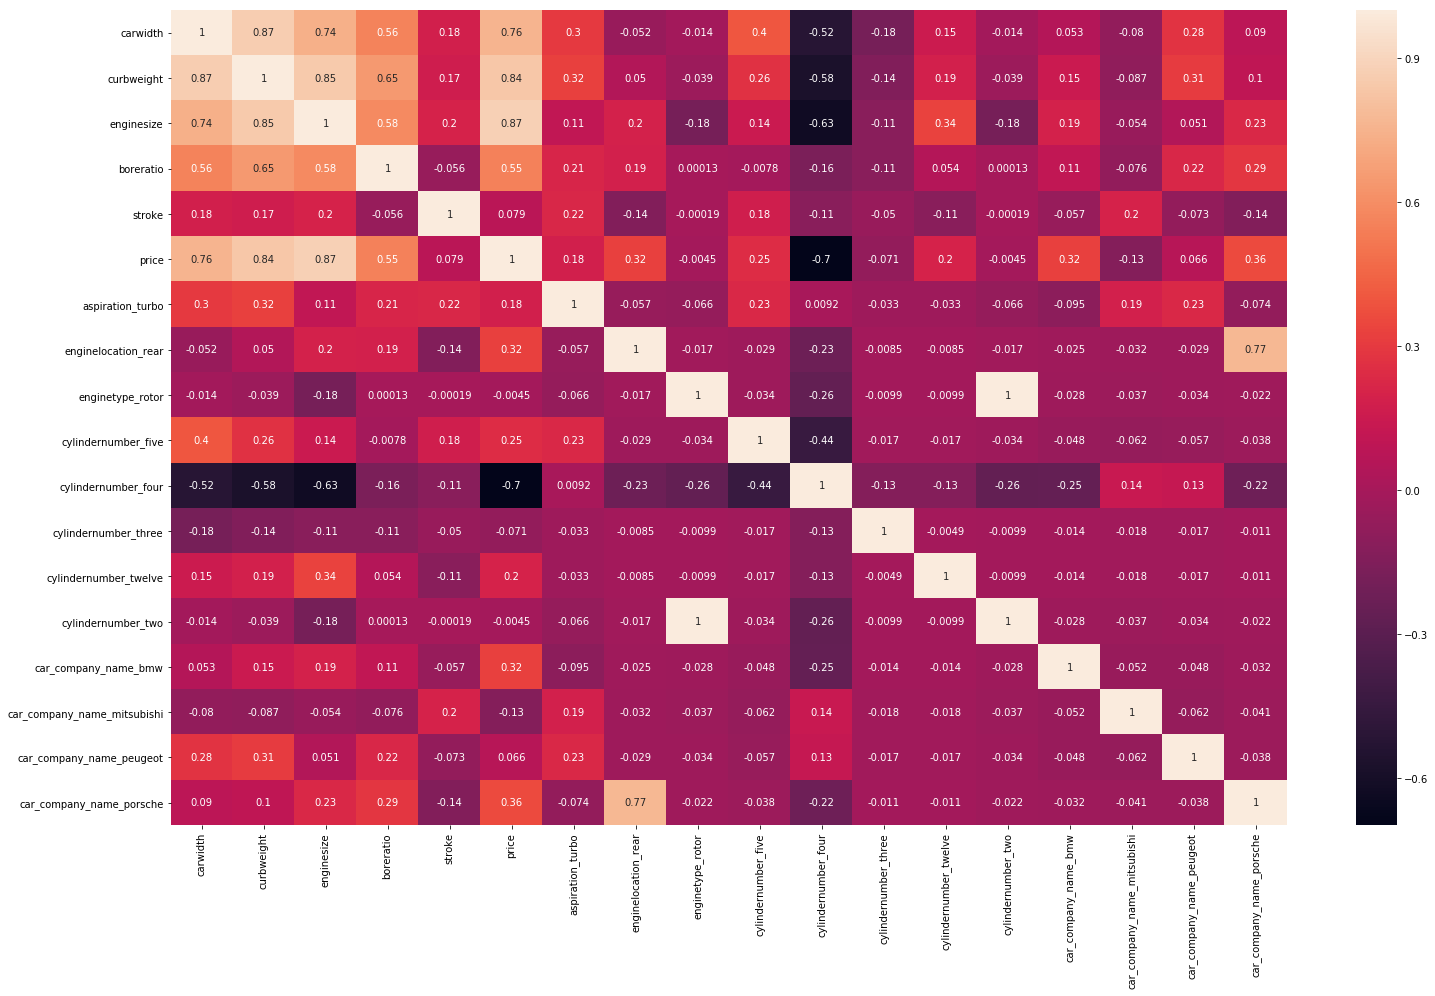

In [58]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,15))     # Size of the figure
sns.heatmap(car_prices.drop(dropcol, axis=1).corr(),annot = True)

<b><font color=blue>From correlation plot it is evident that cylindernumber_four has moderate to high negative correlation with 5 variables. There are other variables too like engine size but we will keep it as it is a important variable from business perspective. Let's drop cylindernumber_four variable and create model 6.</font></b>

In [59]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylindernumber_four', 1)

In [60]:
# Create a second fitted model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [61]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.21e-66
Time:                        15:35:42   Log-Likelihood:                -7.0870
No. Observations:                 143   AIC:                             46.17
Df Residuals:                     127   BIC:                             93.58
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [62]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
7,enginetype_rotor,inf
11,cylindernumber_two,inf
1,curbweight,10.570000
2,enginesize,9.180000
0,carwidth,5.740000
6,enginelocation_rear,3.050000
15,car_company_name_porsche,2.860000
3,boreratio,2.160000
8,cylindernumber_five,1.580000
14,car_company_name_peugeot,1.570000


<b><font color=blue>p-value of cylindernumber_five is increased to 0.543 ( > 0.01). Let's drop that variable and create model 7.</font></b>

In [63]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylindernumber_five', 1)

In [64]:
# Create a second fitted model
lm_7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.34e-67
Time:                        15:35:43   Log-Likelihood:                -7.2966
No. Observations:                 143   AIC:                             44.59
Df Residuals:                     128   BIC:                             89.04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [66]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
7,enginetype_rotor,inf
10,cylindernumber_two,inf
1,curbweight,10.400000
2,enginesize,8.510000
0,carwidth,4.720000
6,enginelocation_rear,2.930000
14,car_company_name_porsche,2.830000
3,boreratio,2.070000
5,aspiration_turbo,1.520000
13,car_company_name_peugeot,1.430000


<b><font color=blue>p-value of cylindernumber_twelve variable is also high at 0.127 (<0.01). Let's drop that variable and create model 8.</font></b>

In [67]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylindernumber_twelve', 1)

In [68]:
# Create a second fitted model
lm_8 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           6.34e-68
Time:                        15:35:44   Log-Likelihood:                -8.6008
No. Observations:                 143   AIC:                             45.20
Df Residuals:                     129   BIC:                             86.68
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [70]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
7,enginetype_rotor,inf
9,cylindernumber_two,inf
1,curbweight,10.040000
2,enginesize,6.740000
0,carwidth,4.700000
6,enginelocation_rear,2.890000
13,car_company_name_porsche,2.830000
3,boreratio,2.000000
5,aspiration_turbo,1.500000
12,car_company_name_peugeot,1.410000


<b><font color=blue>p-value of stroke is increased to 0.031 ( > 0.01). Let's drop that variable and create model 9.</font></b>

In [71]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('stroke', 1)

In [72]:
# Create a second fitted model
lm_9 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [73]:
#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.29e-68
Time:                        15:35:45   Log-Likelihood:                -11.178
No. Observations:                 143   AIC:                             48.36
Df Residuals:                     130   BIC:                             86.87
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [74]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
6,enginetype_rotor,inf
8,cylindernumber_two,inf
1,curbweight,10.010000
2,enginesize,6.410000
0,carwidth,4.700000
5,enginelocation_rear,2.870000
12,car_company_name_porsche,2.820000
3,boreratio,1.920000
4,aspiration_turbo,1.430000
11,car_company_name_peugeot,1.410000


<b><font color=blue>p-value for all variables is under 0.01. From the Correlation values plot it is evident that curbweight, enginesize and carwidth are highly correlated. However enginesize and carwidth variables are more important variables compard to curbweight and curbweight also has highest VIF value. Let's drop curbweight and variable create model 10</font></b>

In [75]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('curbweight', 1)

In [76]:
# Create a second fitted model
lm_10 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [77]:
#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.02e-66
Time:                        15:35:48   Log-Likelihood:                -19.609
No. Observations:                 143   AIC:                             63.22
Df Residuals:                     131   BIC:                             98.77
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [78]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
5,enginetype_rotor,inf
7,cylindernumber_two,inf
0,carwidth,3.500000
1,enginesize,3.490000
4,enginelocation_rear,2.860000
11,car_company_name_porsche,2.760000
2,boreratio,1.820000
3,aspiration_turbo,1.290000
10,car_company_name_peugeot,1.230000
8,car_company_name_bmw,1.090000


<b><font color=blue>p-value of boreratio is increased to 0.07 ( > 0.01). Let's drop that variable and create model 11.</font></b>

In [79]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('boreratio', 1)

In [80]:
# Create a second fitted model
lm_11 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [81]:
#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           3.76e-66
Time:                        15:35:49   Log-Likelihood:                -21.412
No. Observations:                 143   AIC:                             64.82
Df Residuals:                     132   BIC:                             97.42
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [82]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
4,enginetype_rotor,inf
6,cylindernumber_two,inf
0,carwidth,3.470000
1,enginesize,3.150000
3,enginelocation_rear,2.850000
10,car_company_name_porsche,2.650000
2,aspiration_turbo,1.260000
9,car_company_name_peugeot,1.200000
7,car_company_name_bmw,1.080000
8,car_company_name_mitsubishi,1.070000


<b><font color=blue>p-value of car_company_name_porsche is increased to 0.047 ( > 0.01). Let's drop that variable and create model 12.</font></b>

In [83]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('car_company_name_porsche', 1)

In [84]:
# Create a second fitted model
lm_12 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [85]:
#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     157.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.06e-66
Time:                        15:35:50   Log-Likelihood:                -23.548
No. Observations:                 143   AIC:                             67.10
Df Residuals:                     133   BIC:                             96.72
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [86]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
4,enginetype_rotor,inf
6,cylindernumber_two,inf
0,carwidth,3.300000
1,enginesize,3.130000
2,aspiration_turbo,1.240000
9,car_company_name_peugeot,1.190000
3,enginelocation_rear,1.170000
7,car_company_name_bmw,1.080000
8,car_company_name_mitsubishi,1.070000
5,cylindernumber_three,1.040000


<b><font color=blue>All p-values are now < 0.01. From the correlation plot we see that enginetype_rotor and cylindernumer_two are higly correlated. Let's drop enginetype_rotor and create model 13.</font></b>

In [87]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('enginetype_rotor', 1)

In [88]:
# Create a second fitted model
lm_13 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [89]:
#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     157.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.06e-66
Time:                        15:35:51   Log-Likelihood:                -23.548
No. Observations:                 143   AIC:                             67.10
Df Residuals:                     133   BIC:                             96.72
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [90]:
# Calculating Vif value
dropcol = [column for column in car_prices.columns if column != 'price' and 
           column not in X_train_rfe.columns]
vif_cal(input_data=car_prices.drop(dropcol, axis=1), dependent_col="price")

,Var,Vif
0,carwidth,3.30
1,enginesize,3.13
2,aspiration_turbo,1.24
8,car_company_name_peugeot,1.19
3,enginelocation_rear,1.17
5,cylindernumber_two,1.10
6,car_company_name_bmw,1.08
7,car_company_name_mitsubishi,1.07
4,cylindernumber_three,1.04


<b><font color=blue>All p-values are below 0.01 and all VIF values are below 4. Let's now evaluate this model.</font></b>

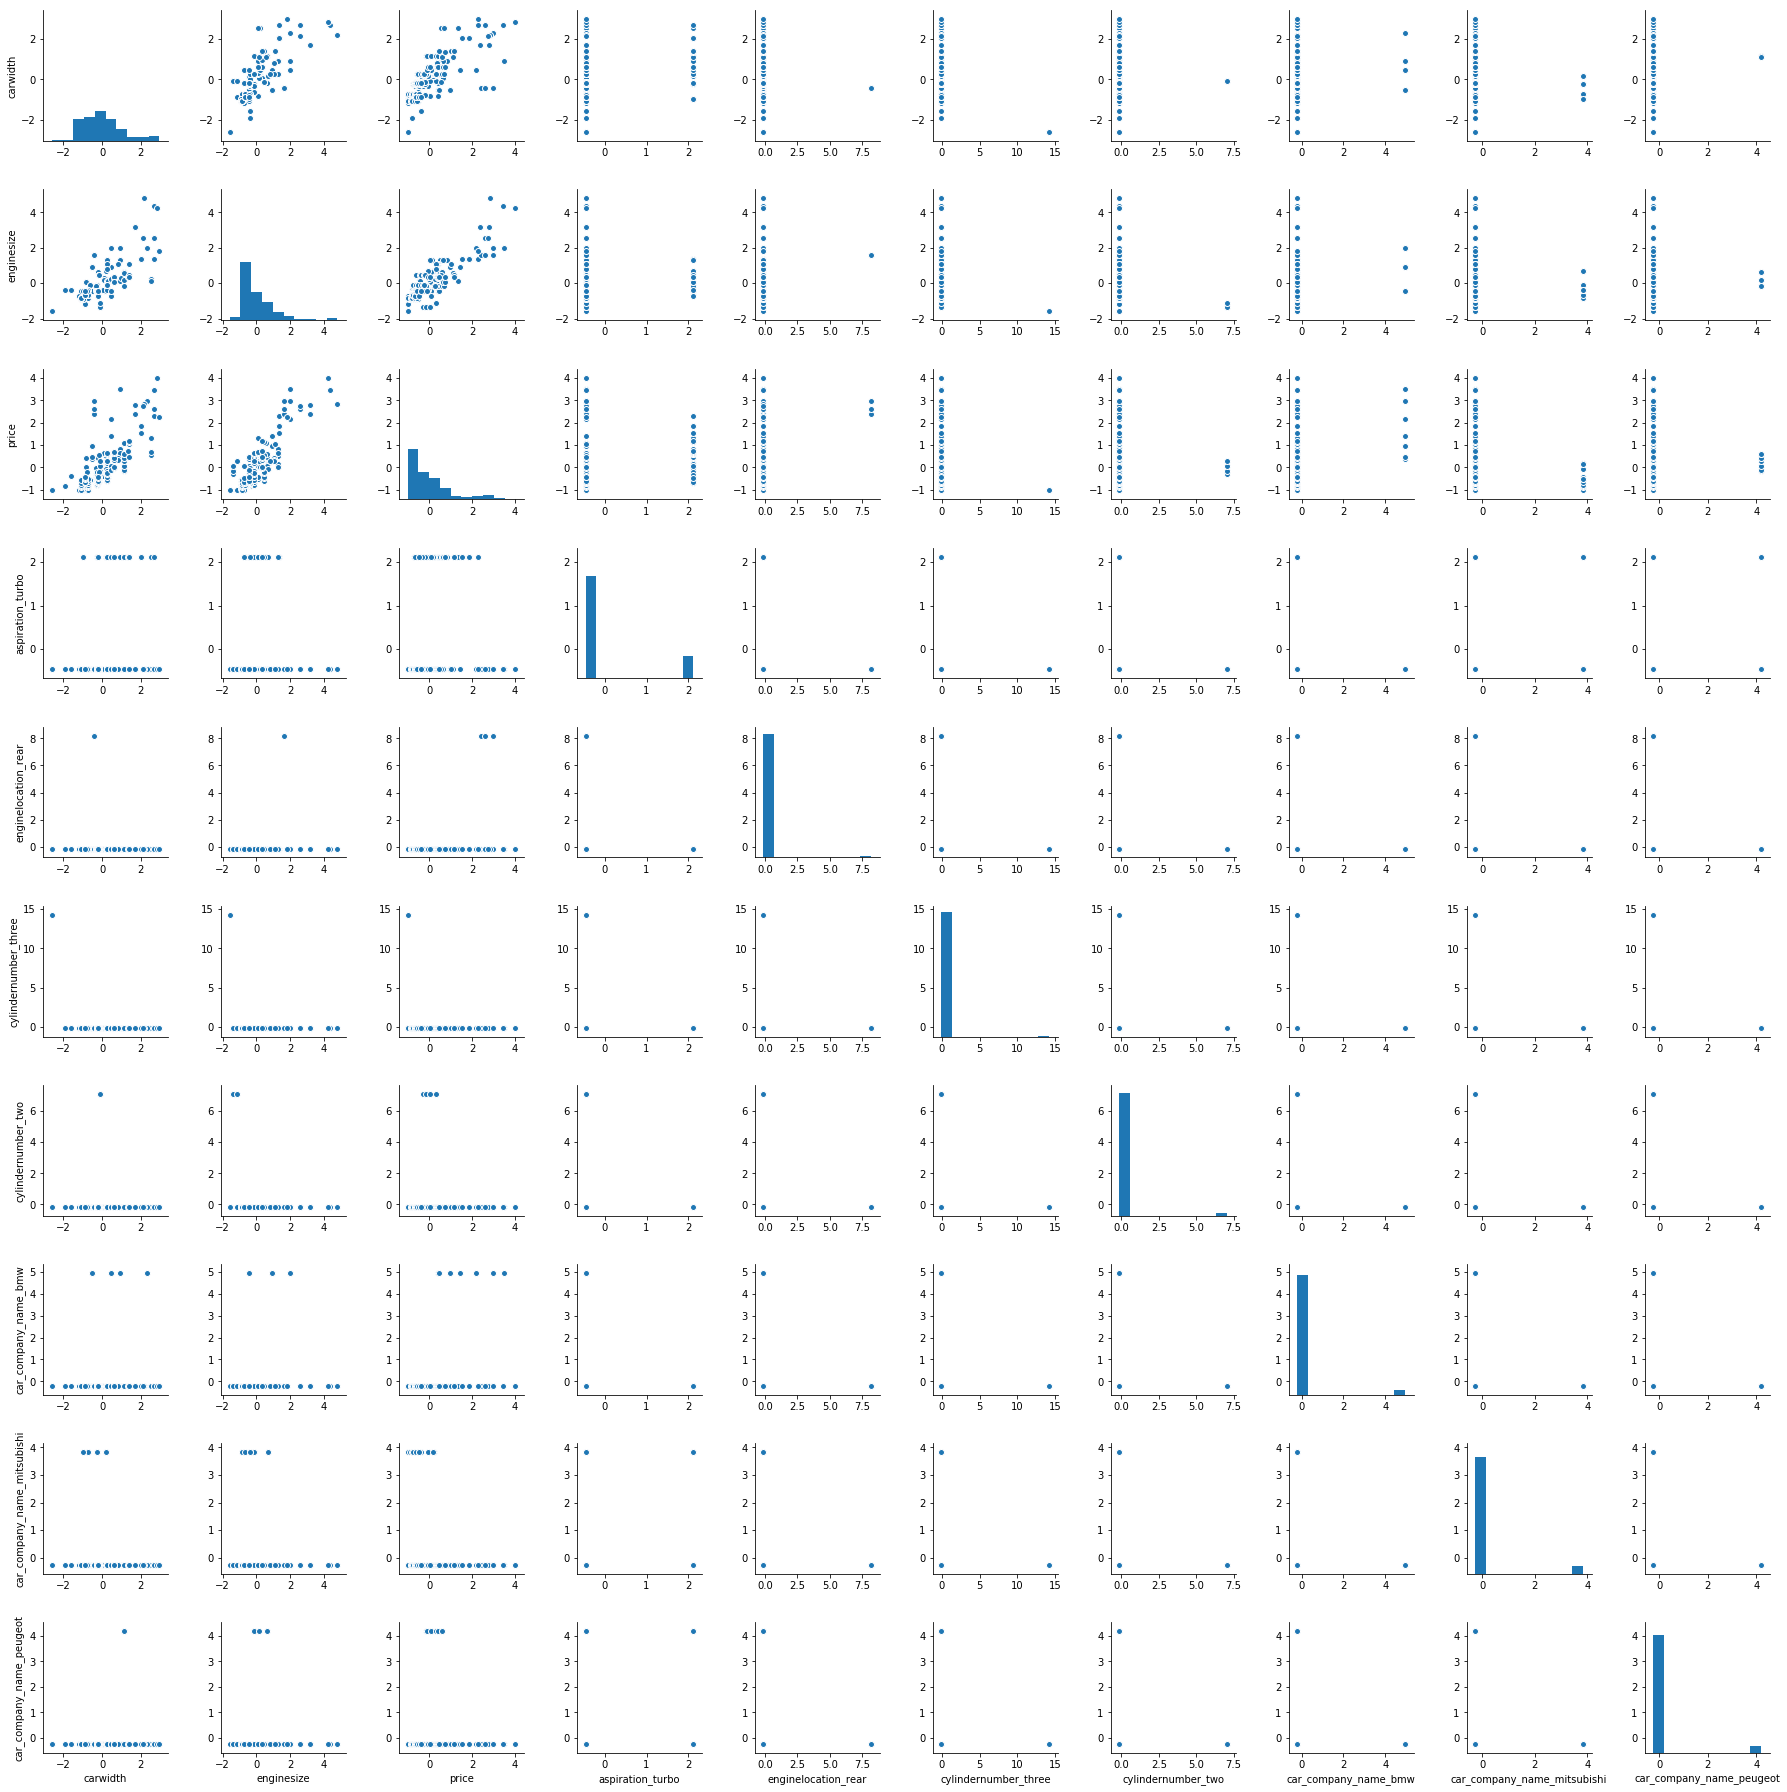

In [91]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's plot a pair plot of all continuous variables including car prices in our dataframe
sns.pairplot(car_prices.loc[:, car_prices.drop(dropcol, axis=1).columns])

<b><font color=blue>We can see that the variables carwidth and enginesize in our model have linear relation with price.</font></b>

## Making Predictions Using the Final Model

### Prediction with Model 13

In [92]:
# Adding  constant variable to test dataframe
X_test_m13 = sm.add_constant(X_test, has_constant='add')

In [93]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m13 = X_test_m13.drop(dropcol, axis=1)

In [94]:
# Making predictions
y_pred_m13 = lm_13.predict(X_test_m13)

## Model Evaluation

Text(0,0.5,'Car Price')

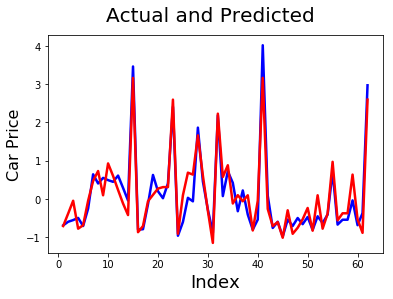

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m13, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

<b><font color=blue>The fit of predicted price (red line) on the actual price (blue line is good..</font></b>

Text(0,0.5,'y_pred')

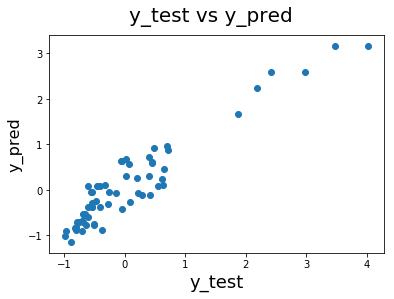

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m13)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

<b><font color=blue>The plot of predicted vs actual values shows that prediction is good.</font></b>

Text(0,0.5,'ytest-ypred')

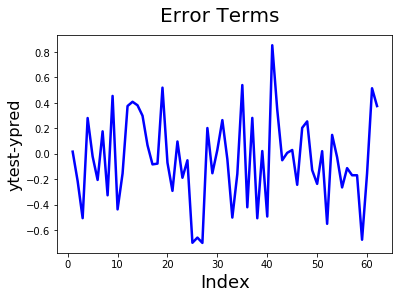

In [97]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m13, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

<b><font color=blue>The error term is random. There is no pattern indicating that we are not missing any significant varaible.</font></b>

Text(0,0.5,'Index')

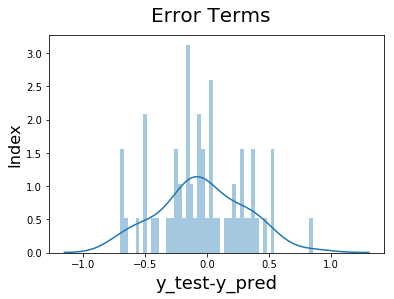

In [98]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m13),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

<b><font color=blue>The error term is distributed around 0 and symmetric.</font></b>

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m13)
r_squared = r2_score(y_test, y_pred_m13)
display(mse)
display(r_squared)

0.11718627434944555

0.89320104298261405

In [100]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m13)))

RMSE : 0.342324808259


<b><font color=blue>The MSE, R-squared and RMSE values are as computed above. 
<br/>Note: RMSE values is within limits considering the price range from min to max value after standardisation is 5.042276 (maximum price - minimum price)</font></b>

## Conclusion

<b><font color=blue>Following is the list of independent variables in our final model:
<br/>1 enginesize
<br/>2 aspiration_turbo
<br/>3 car_company_name_peugeot
<br/>4 enginelocation_rear
<br/>5 cylindernumber_two
<br/>6 car_company_name_bmw
<br/>7 car_company_name_mitsubishi
<br/>8 cylindernumber_three
<br/>
From the coefficients, it is clear that all variables except car_company_name_mitsubishi and car_company_name_peugeot have a positive impact on price.
</font></b>